# Single Neuron Linear Regression 

We will implement and train this model on the palmerpenguins dataset, and get started by running the following code in the cell below.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the palmerpenguins dataset into a pandas DataFrame object
df = pd.read_csv("palmer_penguins.csv")

we choose one of the three species of penguins to implement and train the model. For our purposes we will focus on "Adelie" penguin species. 

## Data preprocessing

In [2]:
df.head(3)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [5]:
df = df[df["species"] == 'Adelie']
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


We use the head method to know the dataset. Rows with NAN should be dropped at first. 

In [6]:
df = df.dropna(how = "any")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Many types of problems and data fall into this roughly linear relationship. For example, one could reasonably suspect that such a relationship exists when considering the penguins dataset Adelie species bill_length as feature measurements together with the Adelie species bill_depth as targets. This can be verified by visualizing the data. Examine the figure generated by running the following code in the cell below.

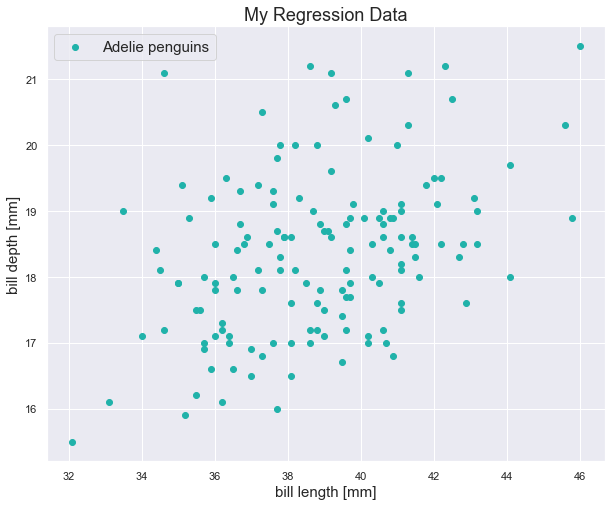

In [7]:
plt.figure(figsize = (10, 8))
plt.scatter(df.bill_length_mm, 
            df.bill_depth_mm, 
            color = "lightseagreen",
            label = "Adelie penguins")
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

From the plot above, it looks like linear relationship between bill_depth and bill_length. Next, we can use the bill_length as the predictor X and bill_depth as the predicted value y

Now that we have defined our custom SingleNeuron class, we next prep our data for training. By running the following code in the cell below, note that the first two lines of code convert the Adelie bill_length column of data into a numpy.ndarray.

CAUTION: Single entry feature vectors need to be reshaped using the reshape(-1, 1) method. This is needed because of the dimensions required for vector and matrix multiplications.



In [9]:
X = df.bill_length_mm.values
X = X.reshape(-1, 1)
y = df.bill_depth_mm.values

we can preview X and y

In [13]:
#X
#y

## Algorithm application

For single neuron models in practice, stochastic gradient descent should be the preferred way for optimizing the weights and bias by minimizing the cost function. We implement stochastic gradient descent with the train method used in the following custom SingleNeuron class.

In [8]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

### -Creating and Training an Instance of the SingleNeuron Class

In order to instantiate a given instance theSingleNeuron model, we need to first define an activation function. After doing so, we can then instantiate a SingleNeuron object. After creating this SingleNeuron, we can then train it by calling the train() method with input X and y. For demonstration purposes, we also pass the keyword arguments alpha = 0.0001 and epochs = 5 into the train() method. Do this by running the following code in the cell below.

In [15]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0001, epochs = 5)

Now that we have created an instance of the SingleNeuron class and called the train method, we can visualize the linear regression line by scatter plotting the data and also ploting the predicted output over some domain within the range of values of input features. Do this by running the following code in the cell below (don't forget that since we are dealing with single measurement features, we must reshape the domain for predicting).

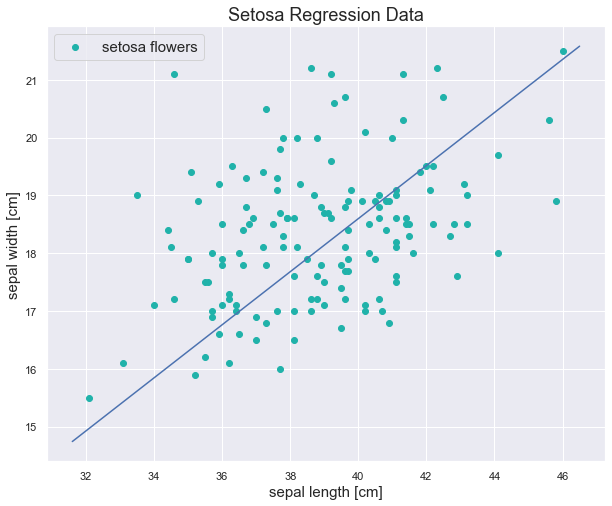

In [17]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "setosa flowers")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]", fontsize = 15)
plt.title("Setosa Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

## Error Analysis

The line generated by our custom SingleNeuron class surely does not look random! We can verify this by plotting the errors_ attribute that we stored while training. Note that the $i$-th entry of the errors_ attribute is the mean-sqaured error of the neuron after the $i+1$ epoch of stochastic gradient descent. If the mean sqaured error is decreasing after each epoch we are on the right track, and our single neuron might be learning!

We can visualize the mean-sqaured error at each epoch of our training process by running the following code in the cell below.

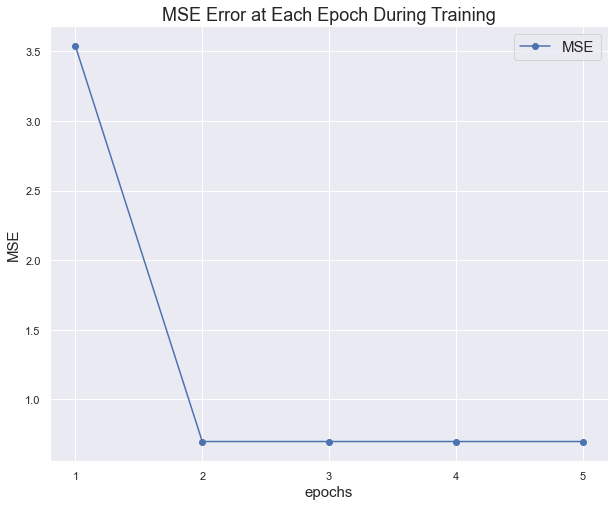

In [18]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()


### - Visualize your Errors over each Epoch

The mean-sqaured error is decreasing over each epoch! Next lets see what happens when we training a single neuron over 10 times more epochs than before, while leaving the learning rate unchanged. Try running the following code in the cell below (note the use of the subplots).



Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

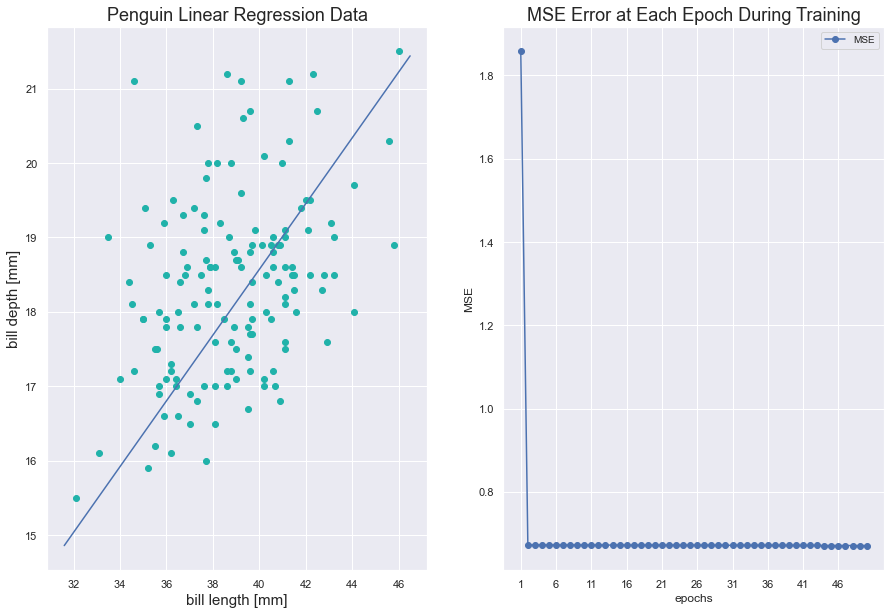

In [26]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("bill length [mm]", fontsize = 15)
ax1.set_ylabel("bill depth [mm]", fontsize = 15)
ax1.set_title("Penguin Linear Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

From the MSE Error plot, we can see that when epochs reach 2, the MSE will not decrease anymore.

### -Experiment with the Learning Rate

As discussed in a previous notebook, the choice of learning rate is a crucial hyperparamter when implementing gradient (and stochastic gradient) descent. We can view different choices of learning rate with a fixed number of epochs by running the following code in the cell below.



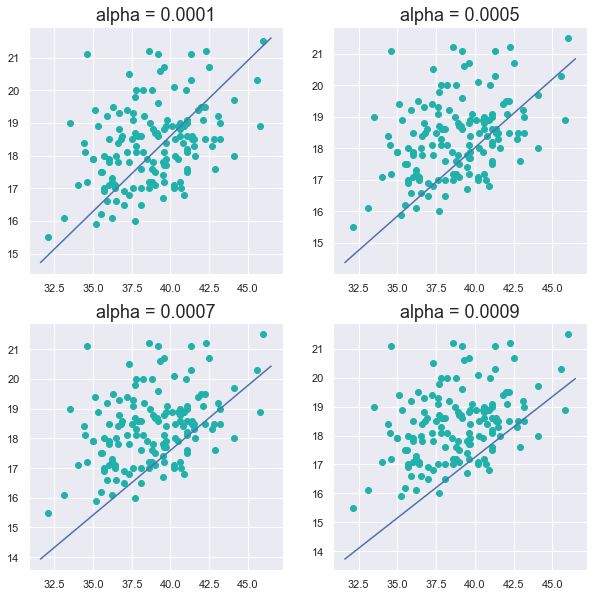

In [30]:
# Possible choices of learning rate 
alphas = [0.0001, 0.0005, 0.0007, 0.0009]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node.train(X, y, alpha = alpha, epochs = 5)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)

During the different learning rates, we can see that alpha=0.0001 can produce the better regression line.